<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/combined_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intrusion Data

In [ ]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
intrusion_data['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [ ]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

class
normal     53.385996
anomaly    46.614004
Name: count, dtype: float64


# Preprocessing

In [ ]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [ ]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
------------
Counts for service:
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
------------
Counts for flag:
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        9866
8         738
1         480
44        467
45        416
         ... 
37

#Attribute Analyses and Input selection

In [ ]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
intrusion_data = pd.read_csv('Train_data.csv')

In [ ]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.562480
dst_bytes                   0.437020
diff_srv_rate               0.358740
same_srv_rate               0.356371
dst_host_srv_count          0.325846
dst_host_same_srv_rate      0.305427
dst_host_diff_srv_rate      0.288567
logged_in                   0.279996
dst_host_serror_rate        0.278079
dst_host_srv_serror_rate    0.272950
dtype: float64


In [ ]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
intrusion_data_right['class_label'].value_counts()

class_label
0    13449
1    11743
Name: count, dtype: int64

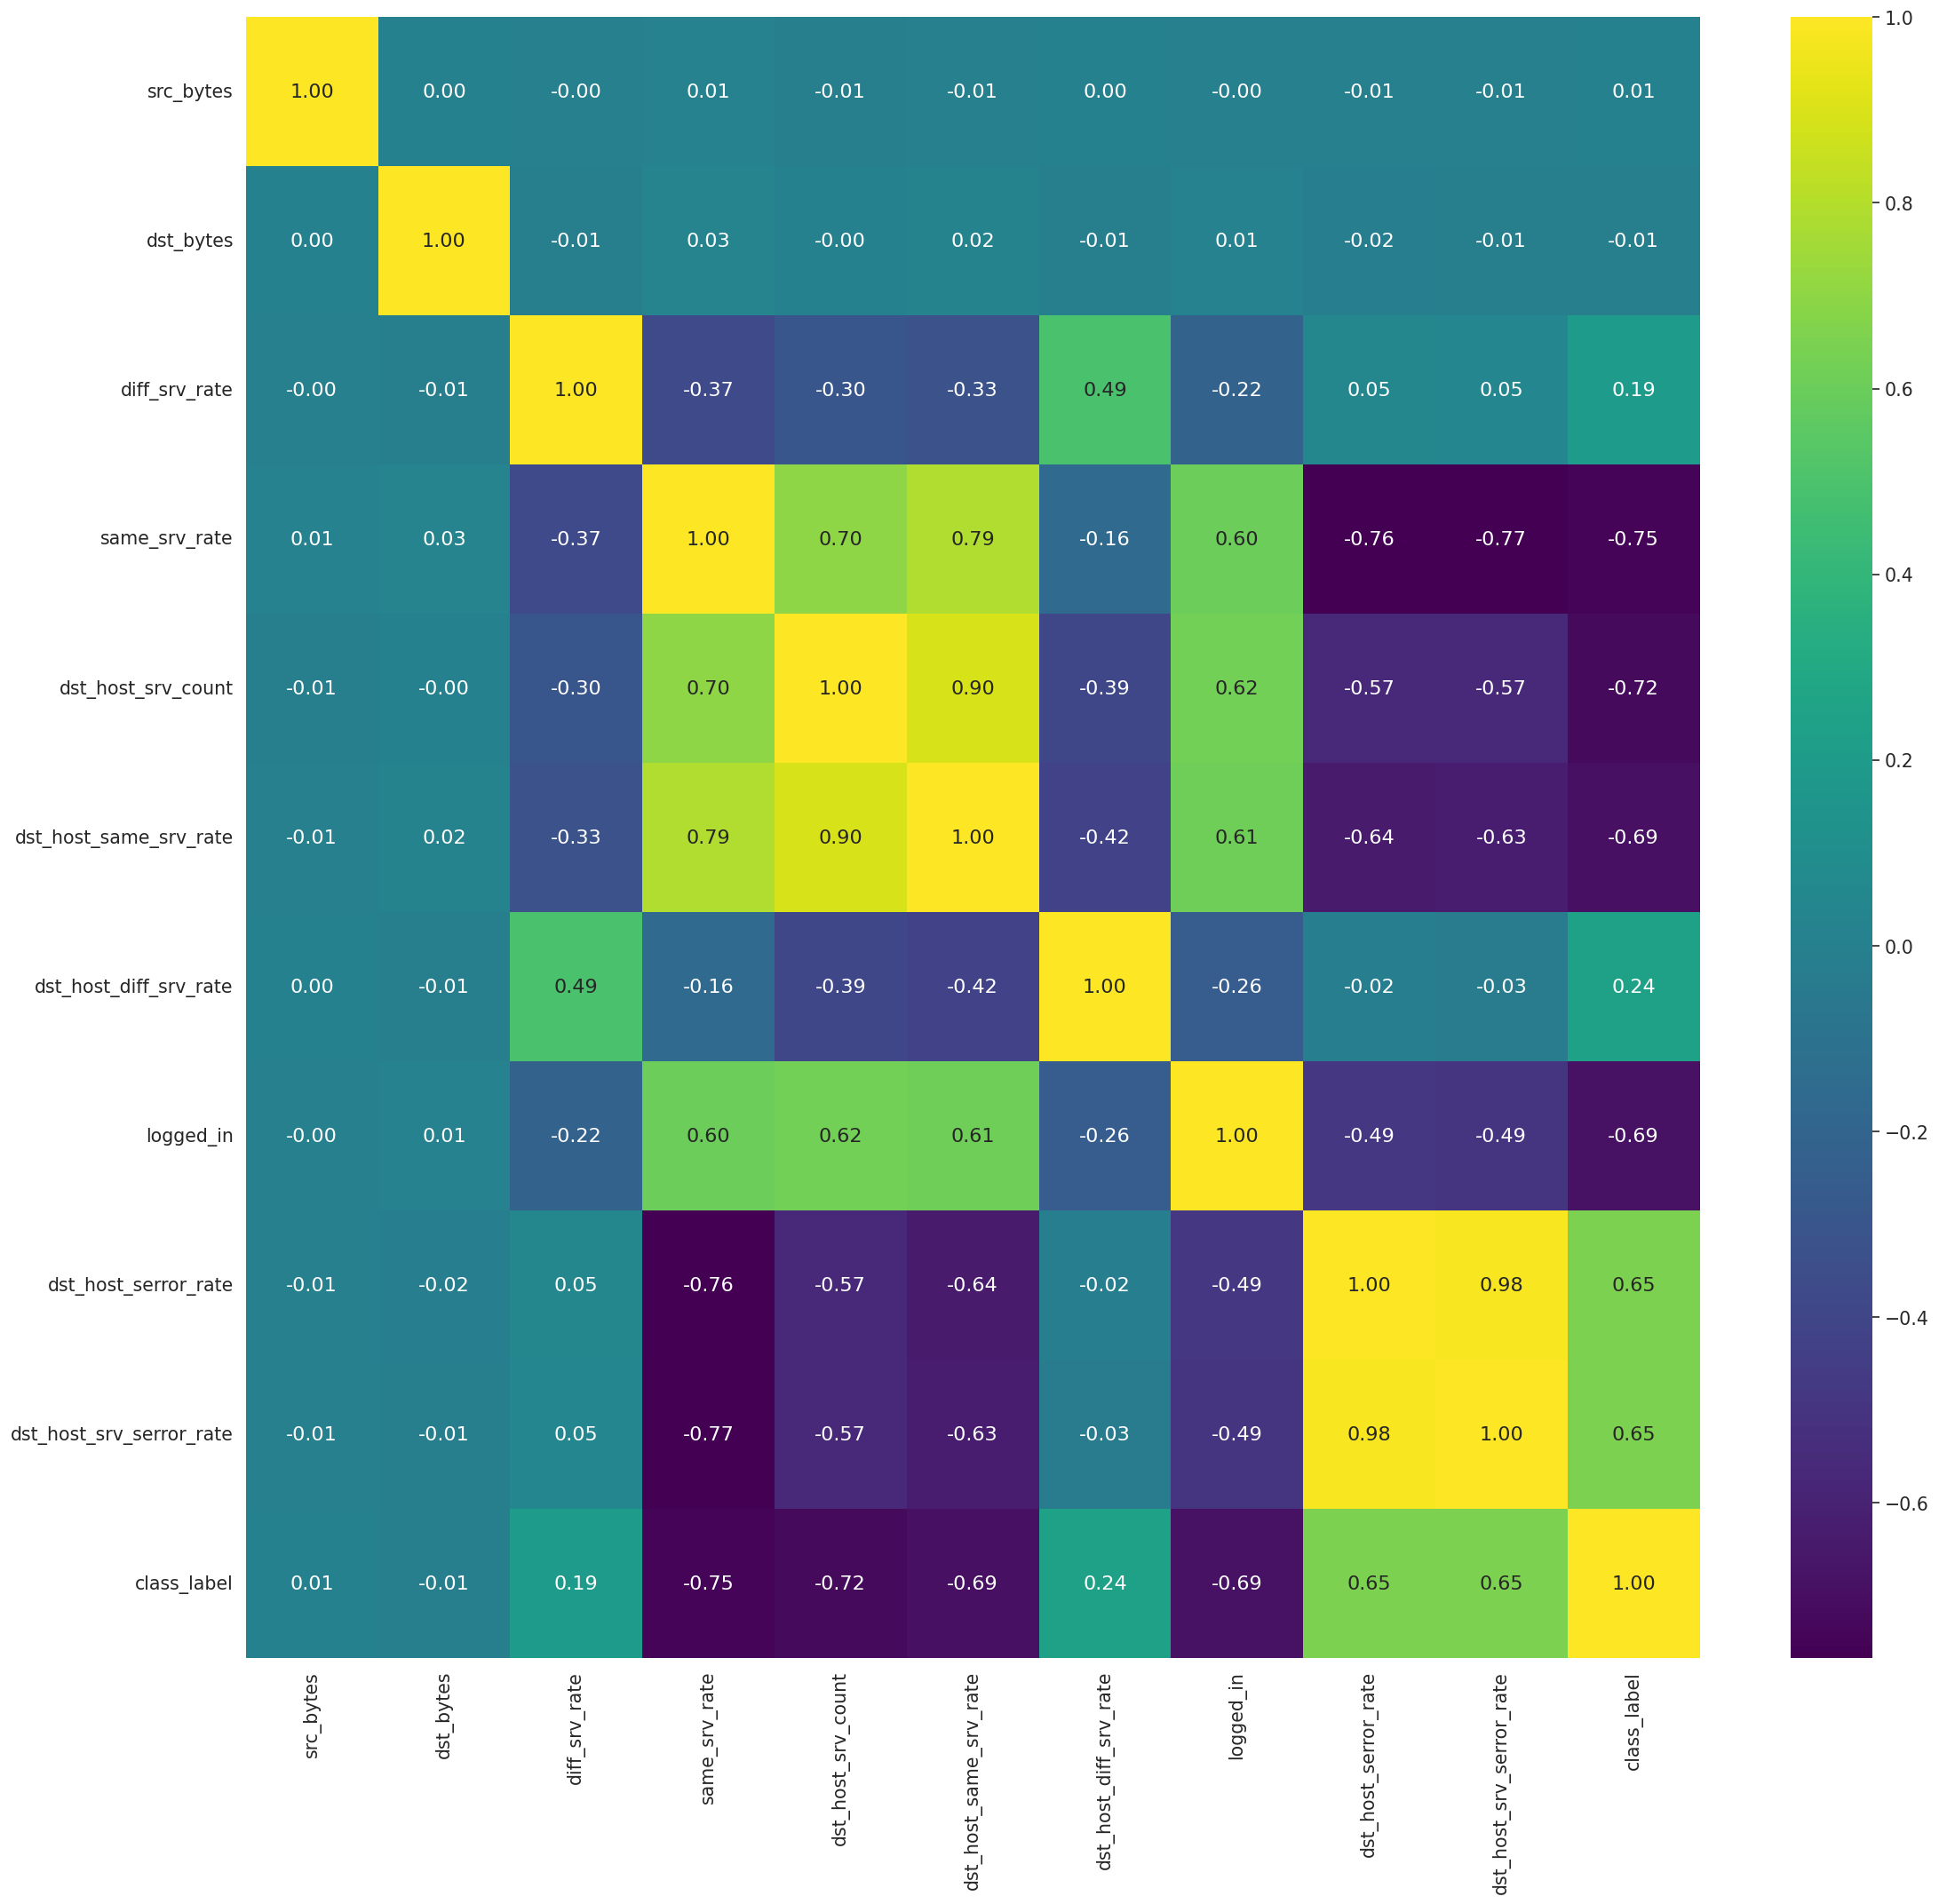

In [ ]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

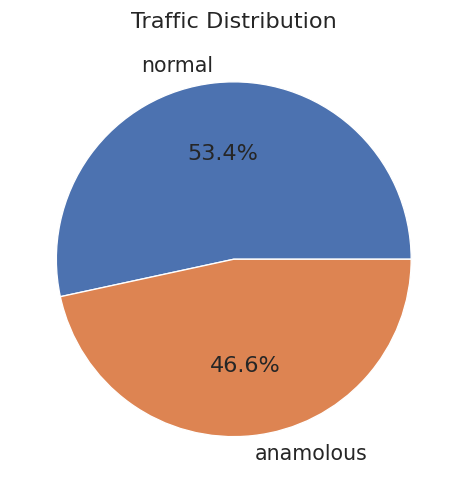

In [ ]:
label_counts = intrusion_data['class'].value_counts()
plt.pie(label_counts, labels=['normal', 'anamolous'], autopct='%1.1f%%')
plt.title('Traffic Distribution')
plt.show()

# Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [ ]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
y_train

11016    0
9763     0
17315    0
23026    0
203      0
        ..
11019    1
16813    0
12084    1
22744    0
3023     0
Name: class_label, Length: 17634, dtype: int64

In [ ]:
y_train.value_counts()

class_label
0    9423
1    8211
Name: count, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [ ]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = int_data_no_strings.drop(["class_label"], axis=1)
y_base = int_data_no_strings["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [ ]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
5375,0,0,0,0,0,0,0,0,0,0,...,119,242,1.00,0.00,0.01,0.02,0.00,0.0,0.76,0.88
3182,0,217,1893,0,0,0,0,0,1,0,...,12,255,1.00,0.00,0.08,0.03,0.00,0.0,0.00,0.00
22982,0,195,10849,0,0,0,0,0,1,0,...,5,255,1.00,0.00,0.20,0.06,0.00,0.0,0.00,0.00
18484,0,43,126,0,0,0,0,0,0,0,...,177,196,0.77,0.02,0.68,0.01,0.00,0.0,0.08,0.00
7160,0,237,4326,0,0,0,0,0,1,0,...,146,255,1.00,0.00,0.01,0.02,0.01,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19009,5,11556,1383,0,0,0,0,0,1,0,...,62,164,0.81,0.06,0.02,0.01,0.00,0.0,0.00,0.00
23376,9,1956,335,0,0,0,0,0,1,0,...,249,126,0.51,0.01,0.00,0.00,0.00,0.0,0.00,0.00
24113,0,329,6148,0,0,0,0,0,1,0,...,15,255,1.00,0.00,0.07,0.05,0.00,0.0,0.00,0.00
10930,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,1.00,0.00,0.00,0.08,0.0,0.87,1.00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [ ]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9972321075523922


In [ ]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9972708623946123


In [ ]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9971734703886066


In [ ]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9972215355712661


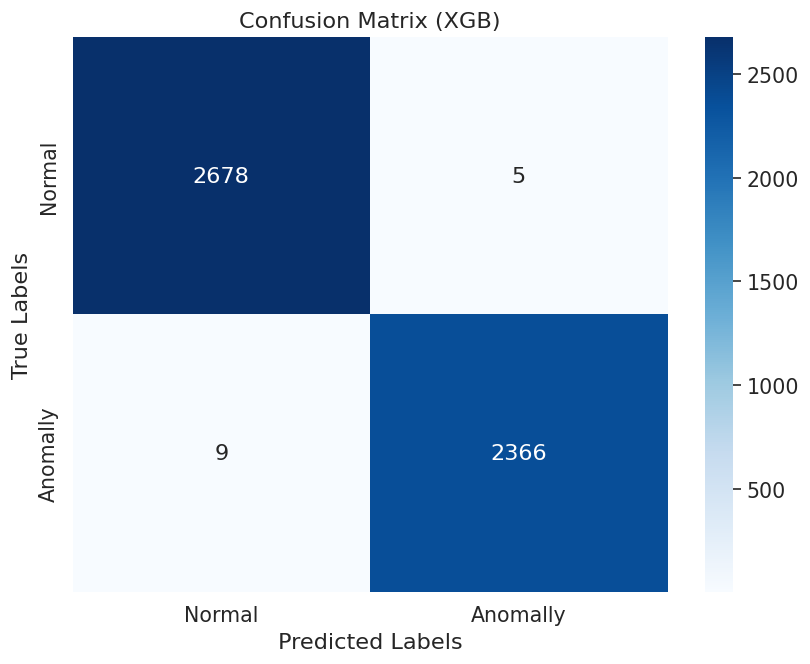

In [ ]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

The AUC is 1.000


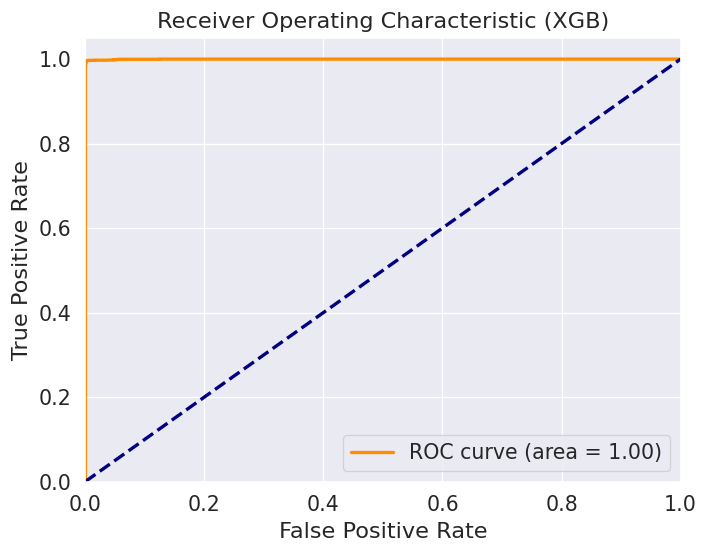

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = xgBoostClassifier.predict_proba(X_test_base)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test_base, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test_base, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB)')
plt.legend(loc="lower right")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)



Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [ ]:
def initialization_of_population(size, n_feat):
    population = []
    for _ in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population, model, X_train, X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:, chromosome], y_train)
        predictions = model.predict(X_test.iloc[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [ ]:
def selection(pop_after_fit, n_parents):
    return pop_after_fit[:n_parents]

In [ ]:
def crossover(pop_after_sel):
    pop_nextgen = []
    for i in range(0, len(pop_after_sel), 2):
        child_1, child_2 = pop_after_sel[i], pop_after_sel[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2], child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
def mutation(pop_after_cross, mutation_rate):
    mutation_range = int(mutation_rate * len(pop_after_cross[0]))
    pop_next_gen = []
    for chromo in pop_after_cross:
        rand_pos = np.random.choice(len(chromo), size=mutation_range, replace=False)
        chromo[rand_pos] = ~chromo[rand_pos]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
def genetic_algorithm(df, label, size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    model = xgBoostClassifier  # Example model (replace with your model)
    best_chromosomes = []
    best_scores = []
    population_nextgen = initialization_of_population(size, n_feat)
    for _ in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, model, X_train, X_test, y_train, y_test)
        print('Best score in generation:', scores[0])
        best_chromosomes.append(pop_after_fit[0])
        best_scores.append(scores[0])
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate)
    return best_chromosomes, best_scores

In [ ]:
z = X_base.shape[1]
z

38

In [ ]:
chromo_df_bc, score_bc = genetic_algorithm(X_base, y_base, size=80, n_feat=X_base.shape[1], n_parents=64,
                                  mutation_rate=0.20, n_gen=5, X_train=X_train_base,
                                  X_test=X_test_base, y_train=y_train_base, y_test=y_test_base)

Best score in generation: 0.994266508501384
Best score in generation: 0.994266508501384
Best score in generation: 0.994266508501384
Best score in generation: 0.9930802688809807
Best score in generation: 0.9916963226571768


In [ ]:
len(int_data_no_strings.columns)

39

In [ ]:
selected_features = X_base.columns[chromo_df_bc[4]]
print(selected_features.tolist())

['duration', 'src_bytes', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'srv_serror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
len(selected_features.tolist())

21

# Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'srv_serror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,duration,src_bytes,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,num_outbound_cmds,...,srv_count,srv_serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_rerror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.0,...,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.424357e-17,1.410255e-19,3.878200e-19,2.242305e-17,-1.099999e-17,8.955117e-18,9.589732e-18,6.205121e-18,2.185895e-17,0.0,...,-8.179477e-18,-2.263459e-17,-4.195508e-18,-1.635895e-17,8.616656e-17,-6.233326e-17,1.635895e-17,-6.924351e-17,5.669224e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.135507e-01,-1.009252e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-3.684274e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,-1.843909e+00,-1.157831e+00,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
25%,-1.135507e-01,-1.009252e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-3.546279e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,-9.953546e-01,-1.046456e+00,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
50%,-1.135507e-01,-1.007427e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-2.718314e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,7.320589e-01,-2.180896e-02,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
75%,-1.135507e-01,-9.976793e-03,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-1.338372e-01,1.600209e+00,-1.323494e-02,-3.738861e-01,7.320589e-01,1.069663e+00,-2.836056e-01,1.603834e+00,-3.742807e-01,1.000000
max,1.584102e+01,1.583257e+02,1.587167e+02,3.565287e+01,8.804599e+01,8.483823e+01,8.475636e+01,7.550206e+01,8.115620e+01,0.0,...,6.669278e+00,1.600209e+00,5.251501e+00,3.523568e+00,7.320589e-01,1.069663e+00,2.764775e+00,1.603834e+00,2.777041e+00,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [ ]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.966785290628707


In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9685005368471189


In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9652202889506969


In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.9665034010473323


In [ ]:
X_test.shape

(5058, 21)

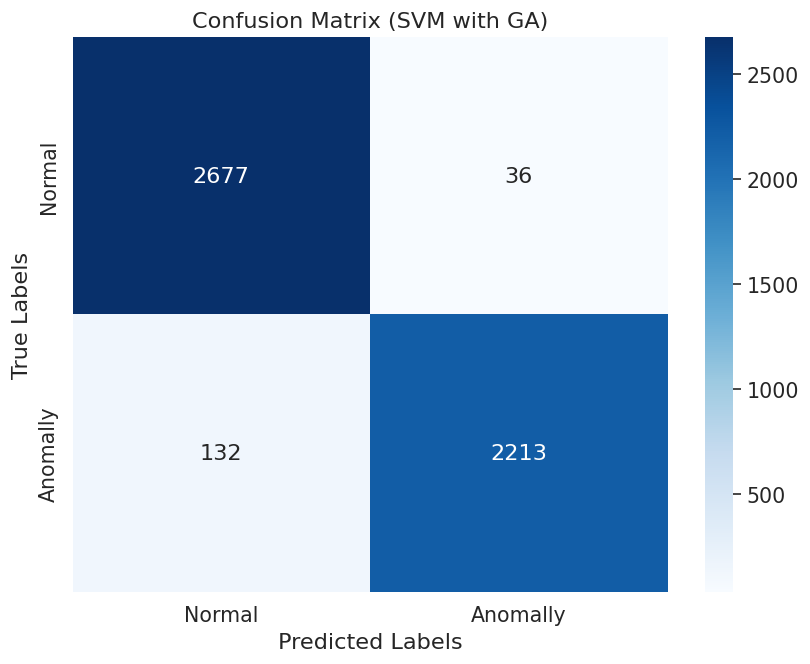

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2713
           1       0.98      0.94      0.96      2345

    accuracy                           0.97      5058
   macro avg       0.97      0.97      0.97      5058
weighted avg       0.97      0.97      0.97      5058



## ROC Curve

The AUC is 0.995


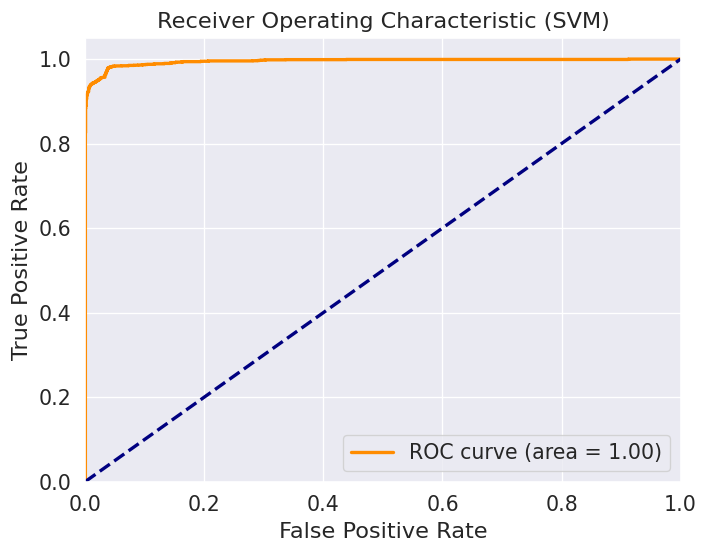

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

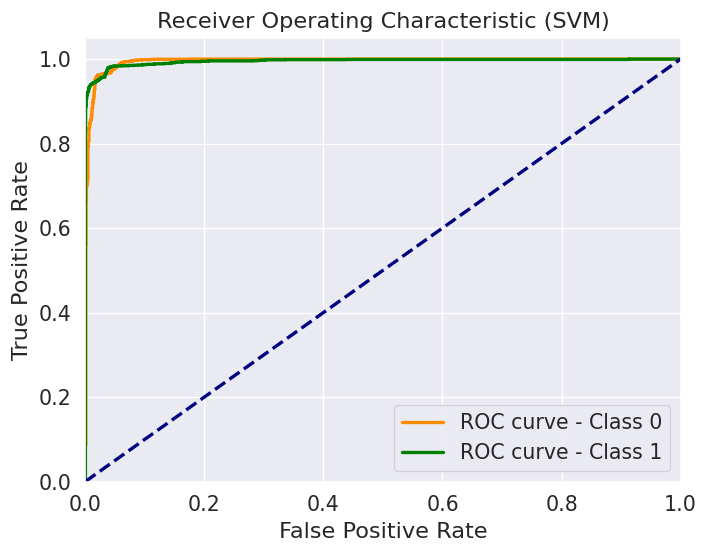

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9668


#Naive Bayes

## Splitting Data

In [ ]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Decision Tree

## Splitting Data

In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
futureSample_X

In [ ]:
y_train.value_counts()

## Train Decision Tree

In [ ]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Random Forrest

##Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

## Measure Random Forrest's performance

In [ ]:
X_test

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Basic Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

## Measure Basic Neural Network performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_NN)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bassic Neural Network)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## KDD Dataset

In [ ]:
KDD_train = pd.read_csv('KDDTrain+.csv')
KDD_test = pd.read_csv('KDDTest+.csv')
KDD_train
KDD_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

class
normal     53.385996
anomaly    46.614004
Name: count, dtype: float64


# Preprocessing

In [ ]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [ ]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
------------
Counts for service:
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
------------
Counts for flag:
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        9866
8         738
1         480
44        467
45        416
         ... 
37

#Attribute Analyses and Input selection

In [ ]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
intrusion_data = pd.read_csv('Train_data.csv')

In [ ]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.562480
dst_bytes                   0.437020
diff_srv_rate               0.358740
same_srv_rate               0.356371
dst_host_srv_count          0.325846
dst_host_same_srv_rate      0.305427
dst_host_diff_srv_rate      0.288567
logged_in                   0.279996
dst_host_serror_rate        0.278079
dst_host_srv_serror_rate    0.272950
dtype: float64


In [ ]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
intrusion_data_right['class_label'].value_counts()

class_label
0    13449
1    11743
Name: count, dtype: int64

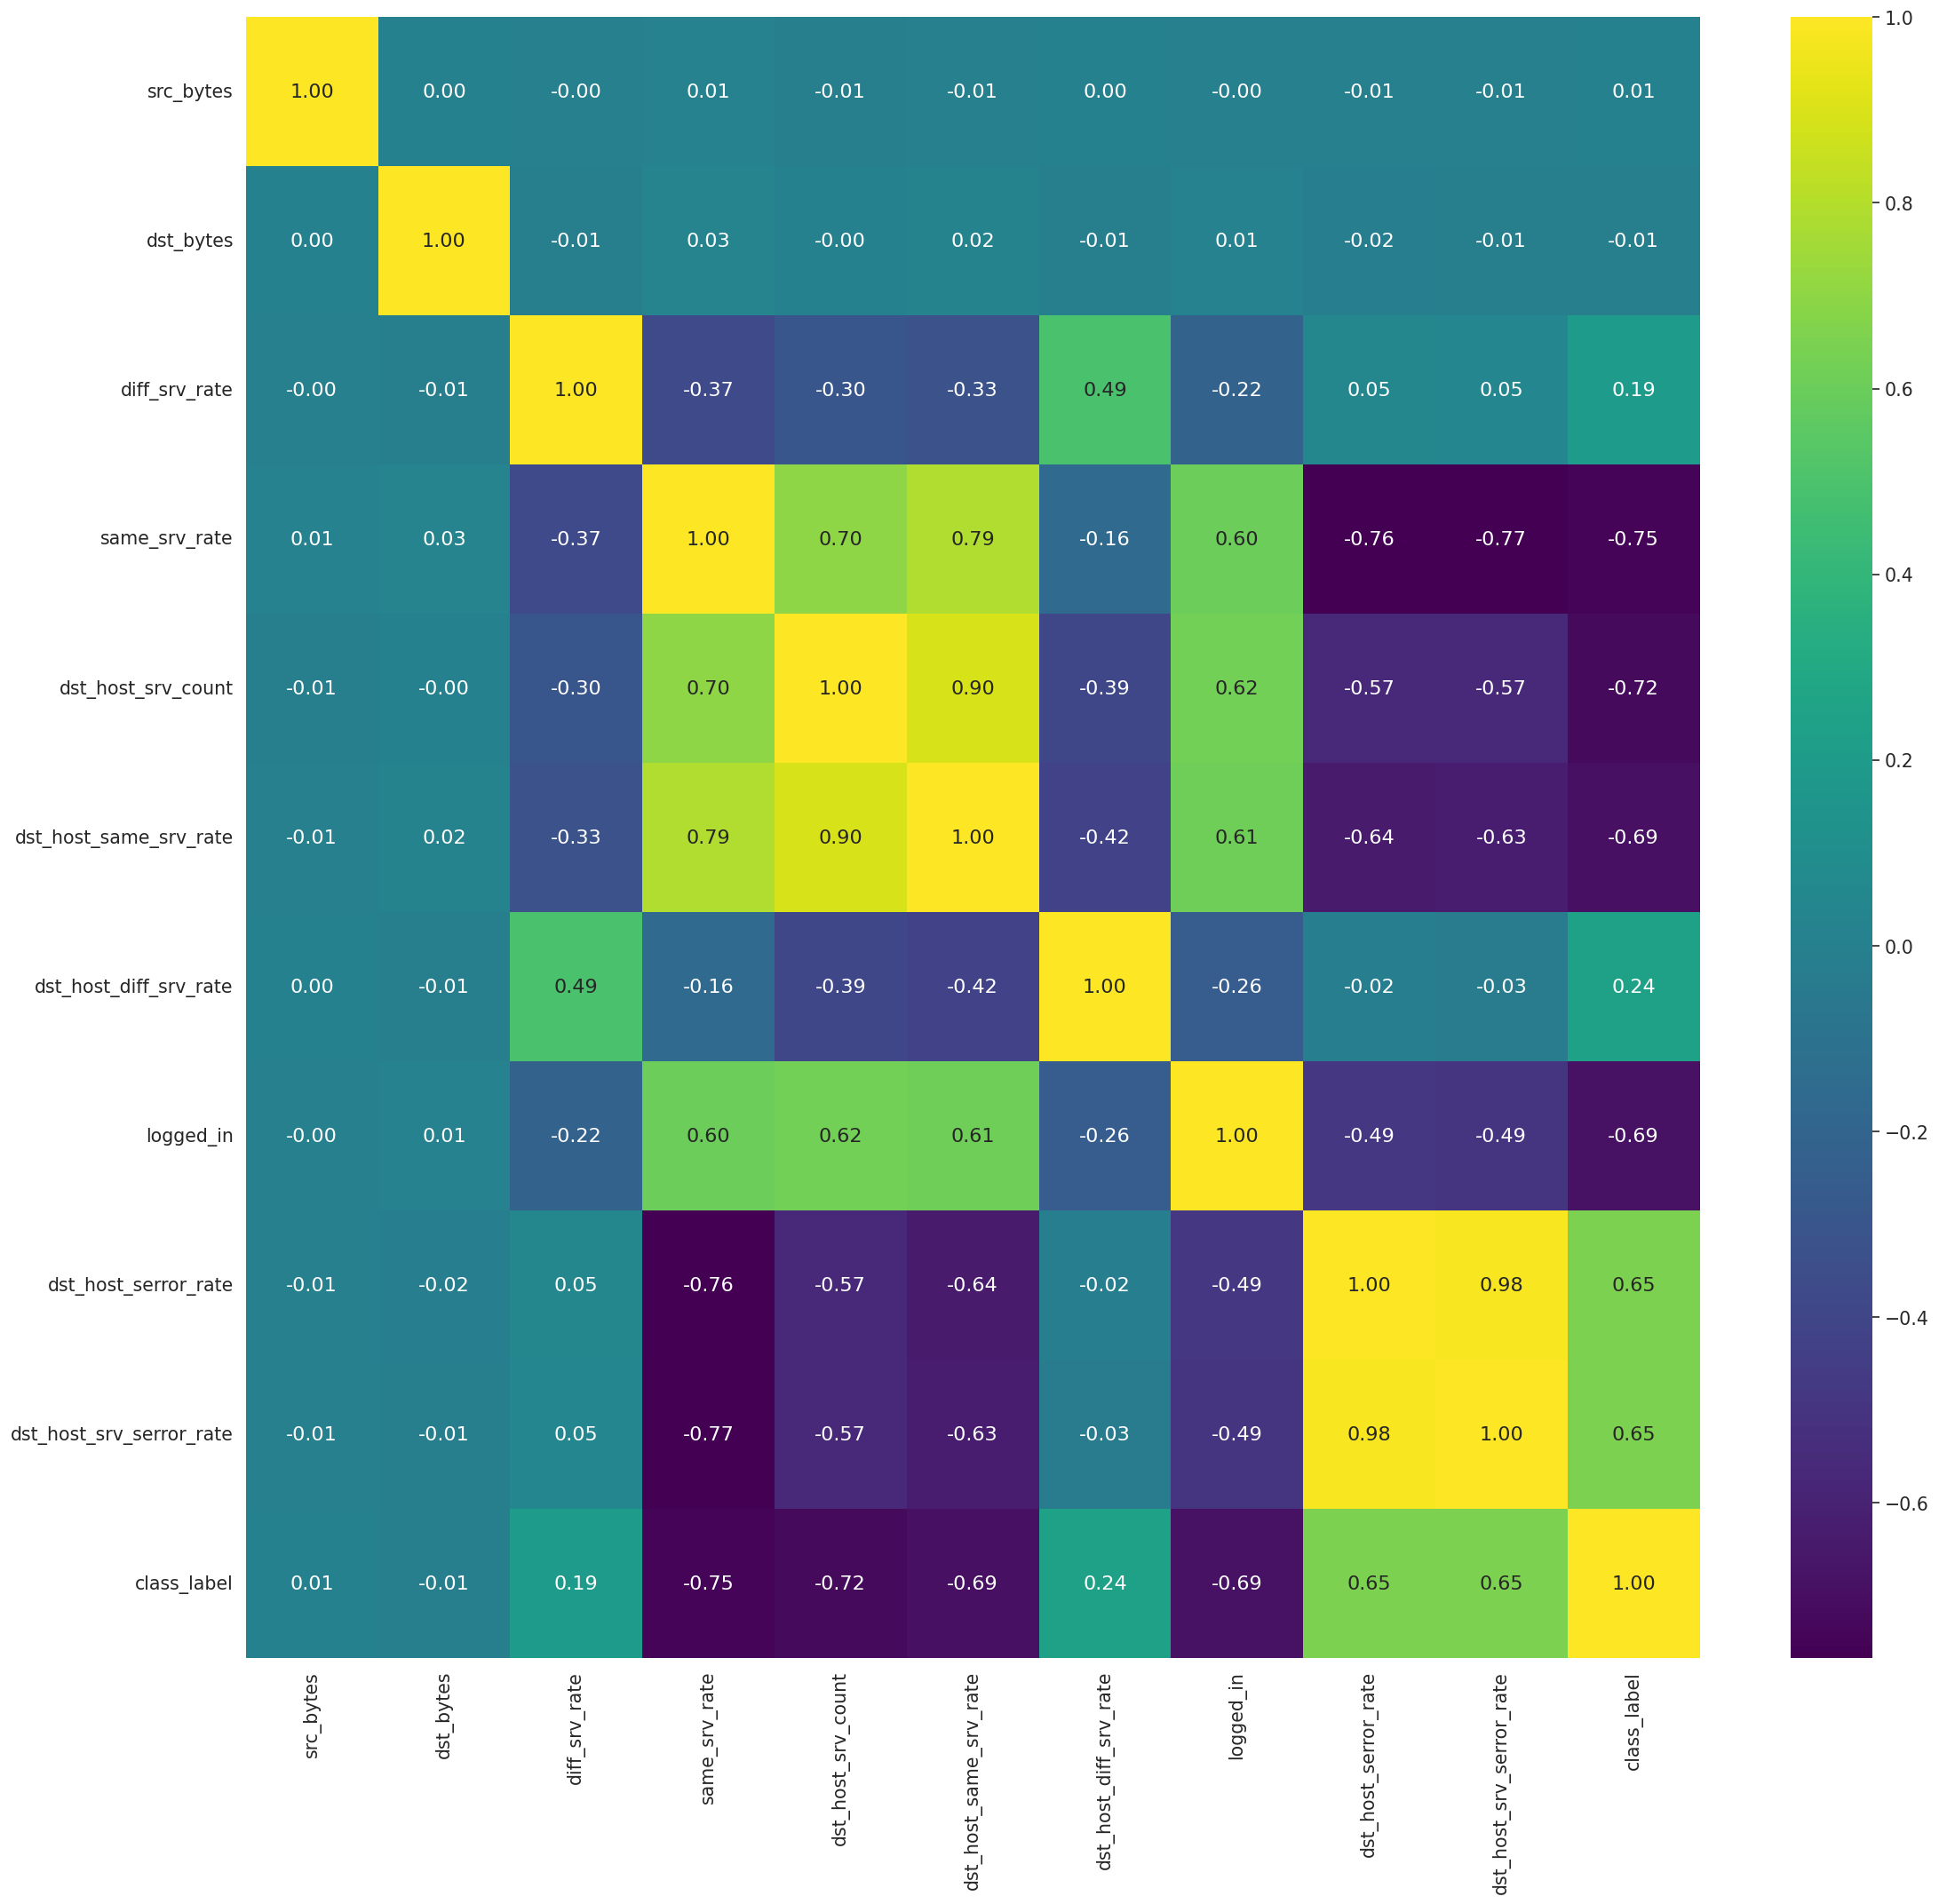

In [ ]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

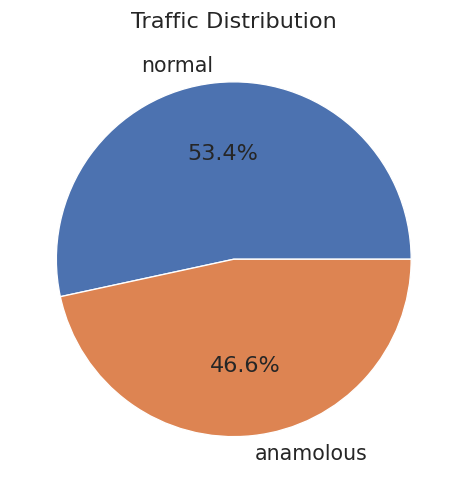

In [ ]:
label_counts = intrusion_data['class'].value_counts()
plt.pie(label_counts, labels=['normal', 'anamolous'], autopct='%1.1f%%')
plt.title('Traffic Distribution')
plt.show()

# Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [ ]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
y_train

11016    0
9763     0
17315    0
23026    0
203      0
        ..
11019    1
16813    0
12084    1
22744    0
3023     0
Name: class_label, Length: 17634, dtype: int64

In [ ]:
y_train.value_counts()

class_label
0    9423
1    8211
Name: count, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [ ]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = int_data_no_strings.drop(["class_label"], axis=1)
y_base = int_data_no_strings["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [ ]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
5375,0,0,0,0,0,0,0,0,0,0,...,119,242,1.00,0.00,0.01,0.02,0.00,0.0,0.76,0.88
3182,0,217,1893,0,0,0,0,0,1,0,...,12,255,1.00,0.00,0.08,0.03,0.00,0.0,0.00,0.00
22982,0,195,10849,0,0,0,0,0,1,0,...,5,255,1.00,0.00,0.20,0.06,0.00,0.0,0.00,0.00
18484,0,43,126,0,0,0,0,0,0,0,...,177,196,0.77,0.02,0.68,0.01,0.00,0.0,0.08,0.00
7160,0,237,4326,0,0,0,0,0,1,0,...,146,255,1.00,0.00,0.01,0.02,0.01,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19009,5,11556,1383,0,0,0,0,0,1,0,...,62,164,0.81,0.06,0.02,0.01,0.00,0.0,0.00,0.00
23376,9,1956,335,0,0,0,0,0,1,0,...,249,126,0.51,0.01,0.00,0.00,0.00,0.0,0.00,0.00
24113,0,329,6148,0,0,0,0,0,1,0,...,15,255,1.00,0.00,0.07,0.05,0.00,0.0,0.00,0.00
10930,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,1.00,0.00,0.00,0.08,0.0,0.87,1.00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [ ]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9972321075523922


In [ ]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9972708623946123


In [ ]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9971734703886066


In [ ]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9972215355712661


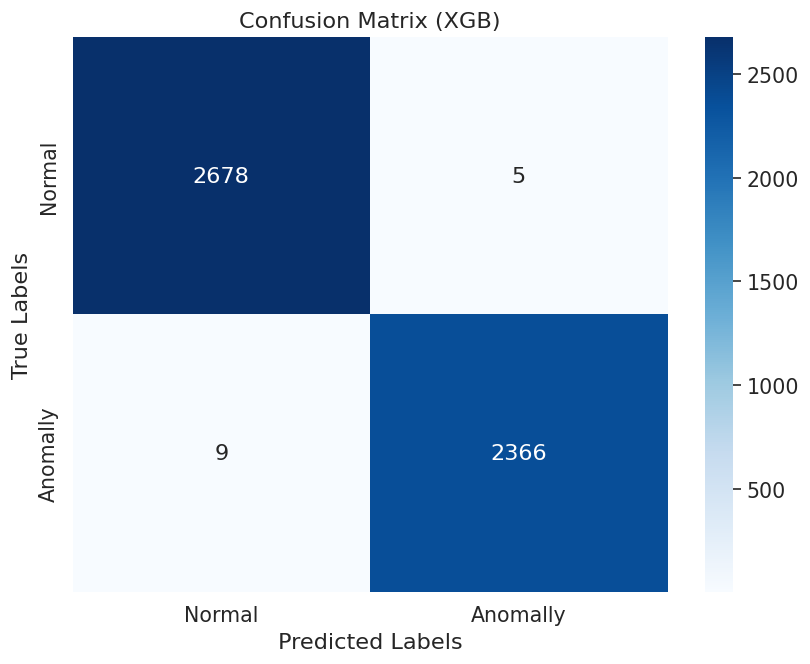

In [ ]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

The AUC is 1.000


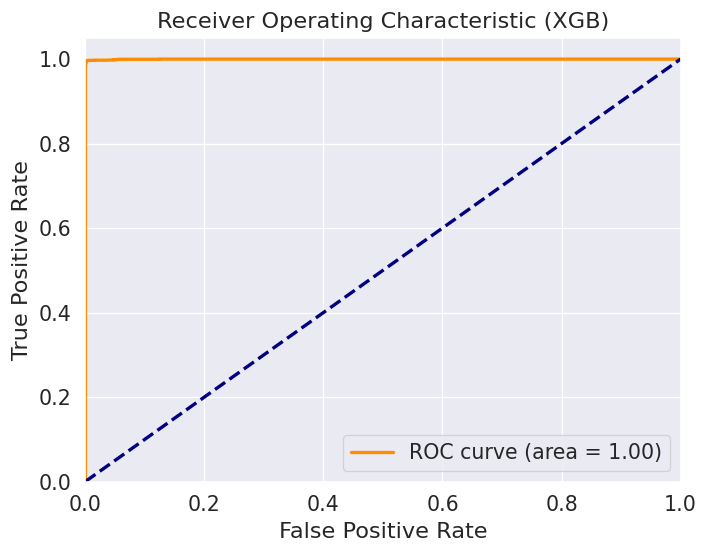

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = xgBoostClassifier.predict_proba(X_test_base)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test_base, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test_base, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB)')
plt.legend(loc="lower right")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)



Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [ ]:
def initialization_of_population(size, n_feat):
    population = []
    for _ in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def fitness_score(population, model, X_train, X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:, chromosome], y_train)
        predictions = model.predict(X_test.iloc[:, chromosome])
        scores.append(accuracy_score(y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [ ]:
def selection(pop_after_fit, n_parents):
    return pop_after_fit[:n_parents]

In [ ]:
def crossover(pop_after_sel):
    pop_nextgen = []
    for i in range(0, len(pop_after_sel), 2):
        child_1, child_2 = pop_after_sel[i], pop_after_sel[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2], child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

In [ ]:
def mutation(pop_after_cross, mutation_rate):
    mutation_range = int(mutation_rate * len(pop_after_cross[0]))
    pop_next_gen = []
    for chromo in pop_after_cross:
        rand_pos = np.random.choice(len(chromo), size=mutation_range, replace=False)
        chromo[rand_pos] = ~chromo[rand_pos]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [ ]:
def genetic_algorithm(df, label, size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    model = xgBoostClassifier  # Example model (replace with your model)
    best_chromosomes = []
    best_scores = []
    population_nextgen = initialization_of_population(size, n_feat)
    for _ in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, model, X_train, X_test, y_train, y_test)
        print('Best score in generation:', scores[0])
        best_chromosomes.append(pop_after_fit[0])
        best_scores.append(scores[0])
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate)
    return best_chromosomes, best_scores

In [ ]:
z = X_base.shape[1]
z

38

In [ ]:
chromo_df_bc, score_bc = genetic_algorithm(X_base, y_base, size=80, n_feat=X_base.shape[1], n_parents=64,
                                  mutation_rate=0.20, n_gen=5, X_train=X_train_base,
                                  X_test=X_test_base, y_train=y_train_base, y_test=y_test_base)

Best score in generation: 0.994266508501384
Best score in generation: 0.994266508501384
Best score in generation: 0.994266508501384
Best score in generation: 0.9930802688809807
Best score in generation: 0.9916963226571768


In [ ]:
len(int_data_no_strings.columns)

39

In [ ]:
selected_features = X_base.columns[chromo_df_bc[4]]
print(selected_features.tolist())

['duration', 'src_bytes', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'srv_serror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
len(selected_features.tolist())

21

# Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'srv_serror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,duration,src_bytes,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,num_outbound_cmds,...,srv_count,srv_serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_rerror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.0,...,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.424357e-17,1.410255e-19,3.878200e-19,2.242305e-17,-1.099999e-17,8.955117e-18,9.589732e-18,6.205121e-18,2.185895e-17,0.0,...,-8.179477e-18,-2.263459e-17,-4.195508e-18,-1.635895e-17,8.616656e-17,-6.233326e-17,1.635895e-17,-6.924351e-17,5.669224e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.0,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.135507e-01,-1.009252e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-3.684274e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,-1.843909e+00,-1.157831e+00,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
25%,-1.135507e-01,-1.009252e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-3.546279e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,-9.953546e-01,-1.046456e+00,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
50%,-1.135507e-01,-1.007427e-02,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-2.718314e-01,-6.339782e-01,-3.492819e-01,-3.738861e-01,7.320589e-01,-2.180896e-02,-4.781831e-01,-6.418041e-01,-3.742807e-01,0.000000
75%,-1.135507e-01,-9.976793e-03,-6.300533e-03,-9.193335e-02,-2.622029e-02,-2.187261e-02,-2.172416e-02,-2.780802e-02,-4.391678e-02,0.0,...,-1.338372e-01,1.600209e+00,-1.323494e-02,-3.738861e-01,7.320589e-01,1.069663e+00,-2.836056e-01,1.603834e+00,-3.742807e-01,1.000000
max,1.584102e+01,1.583257e+02,1.587167e+02,3.565287e+01,8.804599e+01,8.483823e+01,8.475636e+01,7.550206e+01,8.115620e+01,0.0,...,6.669278e+00,1.600209e+00,5.251501e+00,3.523568e+00,7.320589e-01,1.069663e+00,2.764775e+00,1.603834e+00,2.777041e+00,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [ ]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.966785290628707


In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9685005368471189


In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9652202889506969


In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.9665034010473323


In [ ]:
X_test.shape

(5058, 21)

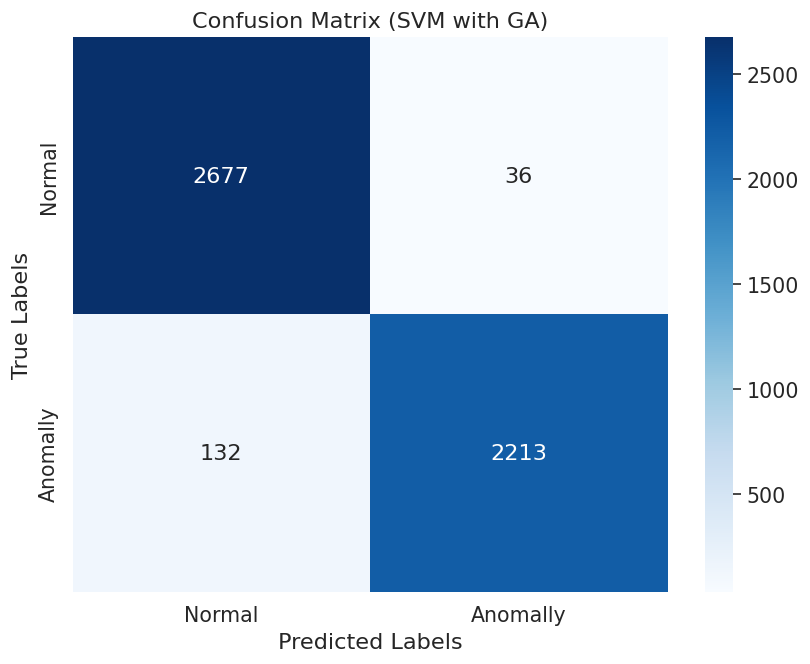

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2713
           1       0.98      0.94      0.96      2345

    accuracy                           0.97      5058
   macro avg       0.97      0.97      0.97      5058
weighted avg       0.97      0.97      0.97      5058



## ROC Curve

The AUC is 0.995


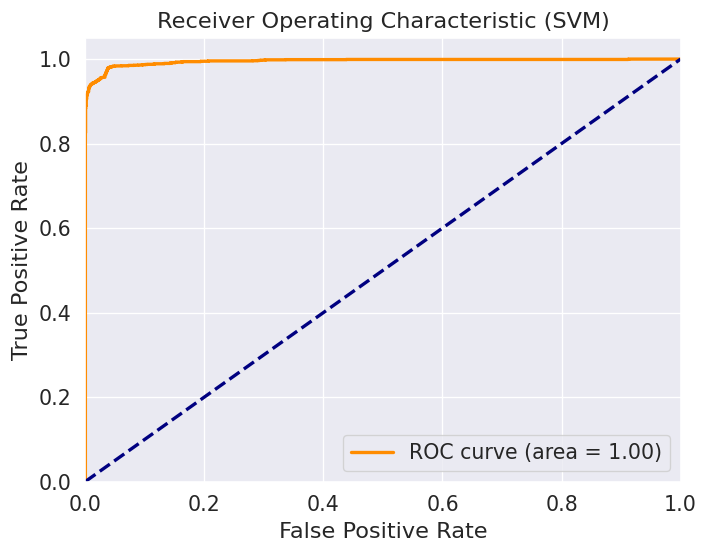

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

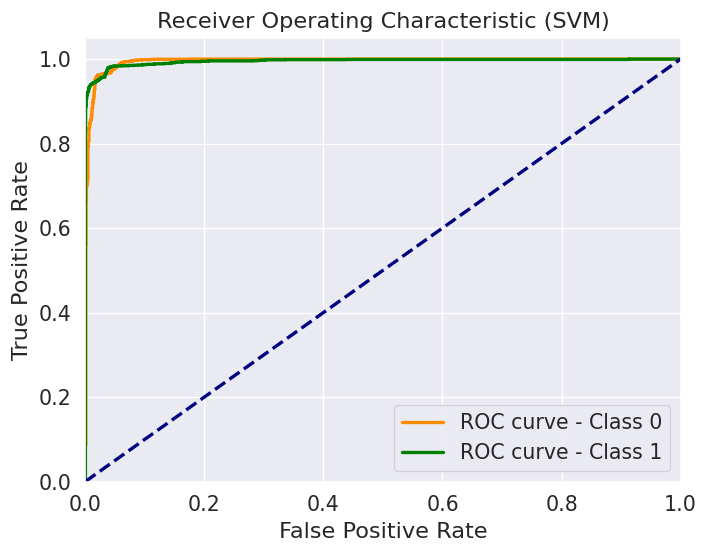

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9668


#Naive Bayes

## Splitting Data

In [ ]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Decision Tree

## Splitting Data

In [ ]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [ ]:
futureSample_X

In [ ]:
y_train.value_counts()

## Train Decision Tree

In [ ]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Random Forrest

##Splitting Data

In [ ]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [ ]:
top_10_info_gain = int_data_no_strings

In [ ]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [ ]:
y_train.value_counts()

## Train Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

## Measure Random Forrest's performance

In [ ]:
X_test

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(futureSample_X)

In [ ]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

# Basic Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

## Measure Basic Neural Network performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_NN)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bassic Neural Network)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()